# Homework 7 - Classification



## Exercise 1

Objective:
Implement a kNN classifier and apply it to the toy dataset.

The toy dataset contains N number of 2D samples, each sample has a label.
There are three classes in the dataset.

kNN algorithm:
1. Compute distances between the test sample and all training samples.
2. Find the k nearest neighbors of the test sample.
3. Label of the test sample is the most common label of the k nearest neighbors.
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def generate_synthetic_data(n_samples=100, random_state=42):
    """
    Generates a synthetic dataset with three classes.

    :param n_samples: Number of samples per class
    :param random_state: Seed for reproducibility
    :returns: Tuple containing features and labels for training and testing sets
    """
    np.random.seed(random_state)
    # Class 0: centered at (1,1)
    X0 = np.random.randn(n_samples, 2) + np.array([1, 1])
    X0 += np.random.uniform(-0.5, 0.5, X0.shape)  # Add uniform noise
    y0 = np.zeros(n_samples)
    # Class 1: centered at (3,3)
    X1 = np.random.randn(n_samples, 2) + np.array([3, 3])
    X1 += np.random.uniform(-0.5, 0.5, X1.shape)  # Add uniform noise
    y1 = np.ones(n_samples)
    # Class 2: centered at (2,4)
    X2 = np.random.randn(n_samples, 2) + np.array([2, 4])
    X2 += np.random.uniform(-0.5, 0.5, X2.shape)  # Add uniform noise
    y2 = np.full(n_samples, 2)
    # Add some outliers
    outliers = np.random.randn(n_samples // 10, 2) * 5
    X_outliers = np.vstack((X0, X1, X2, outliers))
    y_outliers = np.hstack((y0, y1, y2, np.random.choice([0, 1, 2], size=n_samples // 10)))
    # Combine the data
    X = X_outliers
    y = y_outliers
    return X, y


In [4]:
def plot_data(X, y, X_test, y_test):
    """
    Plots the synthetic dataset.

    :param X: Feature matrix
    :param y: Labels
    :param X_test: Test feature matrix
    :param y_test: Test labels
    """
    plt.scatter(
        X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.5
    )
    plt.scatter(
        X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.5
    )
    plt.scatter(
        X[y == 2][:, 0], X[y == 2][:, 1], color="green", label="Class 2", alpha=0.5
    )
    if X_test is not None and y_test is not None:
        plt.scatter(
            X_test[y_test == 0][:, 0],
            X_test[y_test == 0][:, 1],
            color="red",
            label="Class 0 (Predicted)",
            marker="x",
        )
        plt.scatter(
            X_test[y_test == 1][:, 0],
            X_test[y_test == 1][:, 1],
            color="blue",
            label="Class 1 (Predicted)",
            marker="x",
        )
        plt.scatter(
            X_test[y_test == 2][:, 0],
            X_test[y_test == 2][:, 1],
            color="green",
            label="Class 2 (Predicted)",
            marker="x",
        )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Synthetic Data")

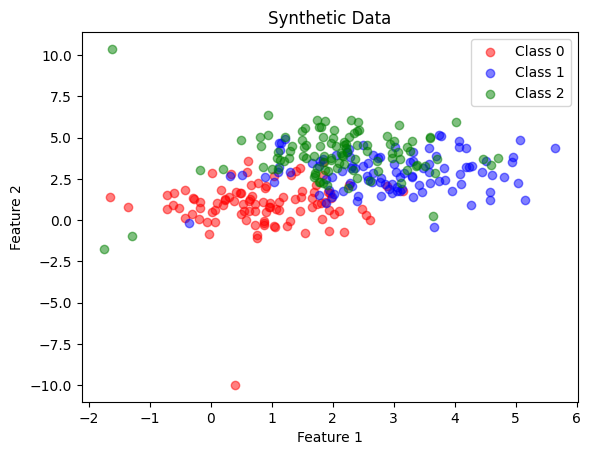

In [5]:
# Take a look at the training data
X, y = generate_synthetic_data(n_samples=100)
plot_data(X, y, None, None)

In [6]:
class KNNClassifier:
    """
    A simple K-Nearest Neighbors classifier.

    :param n_neighbors: Number of neighbors to use for classification
    """

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Stores the training data.

        :param X: Training feature matrix
        :param y: Training labels
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X) -> np.ndarray:
        """
        Predicts the label for each sample in X.

        :param X: Test feature matrix
        :returns: Predicted labels
        """
        # <your_code_here>
        predictions = np.array([self._predict_single(x) for x in X])
        # </your_code_here>
        return predictions

    def _predict_single(self, x) -> int:
        """
        Predicts the label for a single sample.
        
        This method should:
        - compute distances between the test sample x and all training samples
        - find the k nearest neighbors (`self.n_neighbors`) of the test sample (the samples with the smallest distance)
        - predict the label of the test sample as the most common label of the k nearest neighbors
        :param x: Single test sample
        :returns: Predicted label
        """
        # Compute distances
        distances = self._compute_distances(x)
        # <your_code_here>
        nearest_indices = np.argsort(distances)[:self.n_neighbors]
        nearest_labels = self.y_train[nearest_indices]

        # bincount counts occurrences of each integer in array
        # argmax returns index (label) with highest count
        label = np.bincount(nearest_labels.astype(int)).argmax()
        # </your_code_here>
        return label

    def _compute_distances(self, x) -> np.ndarray:
        """
        Computes Euclidean distances between x and all training samples.

        :param x: Single test sample
        :returns: Array of distances
        """
        # <your_code_here>
        distances = np.sqrt(np.sum((x-self.X_train)**2, axis=1))
        # </your_code_here>
        return distances

Accuracy for k=1: 0.76
Accuracy for k=3: 0.74
Accuracy for k=5: 0.74
Accuracy for k=7: 0.76
Accuracy for k=9: 0.76
Accuracy for k=11: 0.78
Accuracy for k=13: 0.78
Accuracy for k=15: 0.74
Best accuracy is for k=11
Accuracy on the test set: 0.69


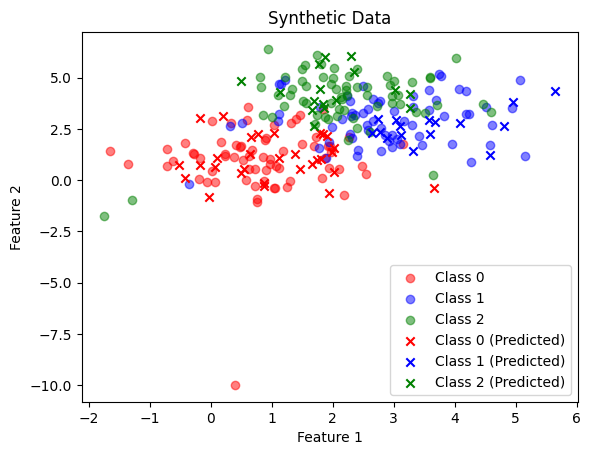

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Grid search for the best k
best_k = None
best_accuracy = 0
for k in [1, 3, 5, 7, 9, 11, 13, 15]:
    # checking which k is the best
    classifier = KNNClassifier(n_neighbors=k)
    # train on `training` set
    classifier.fit(X_train, y_train)
    # validate on `validation` set
    predictions = classifier.predict(X_validate)
    accuracy = np.mean(predictions == y_validate)
    print(f"Accuracy for k={k}: {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print(f"Best accuracy is for k={best_k}")   
classifier = KNNClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train)
# test on `testing` set
labels = classifier.predict(X_test)
print(f"Accuracy on the test set: {np.mean(labels == y_test):.2f}")
plot_data(X_train, y_train, X_test, labels)